# Trabalho Prático 3
**Grupo 22**

Alexis Correia - A102495 <br>
João Fonseca - A102512 <br>

## Problema 2

Relativo ao programa do problema anterior,

1. Construa um “Control Flow Automaton (CFA)” que determina este programa. Identifique os locais e as transições/ramos.  Numa abordagem orientada às pré-condições  identifique os transformadores de predicados associados aos vários locais e os “switches” associados aos vários ramos. 
2. Construa em `z3` o sistema de equações que representa o comportamento deste sistema dinâmico sob o ponto de vista da prova de segurança e verifique a segurança do programa através da resolução (total ou parcial) deste sistema.
> sugere-se (não é obrigatório mas é valorizado !), na alínea (a), uma representação do CFA através de  um grafo orientado  implementado  em `networkx`  e a sua compilação para o sistema de equações.

## Resolução

```Python
{INPUT  a, b}
{assume  a > 0 and b > 0}

0: r, r', s, s', t, t' = a, b, 1, 0, 0, 1
1: while r' != 0:
2:   q = r div r'
3:   r, r', s, s', t, t' = r', r − q × r', s', s − q × s', t', t − q × t' 

{OUTPUT r, s, t}
```

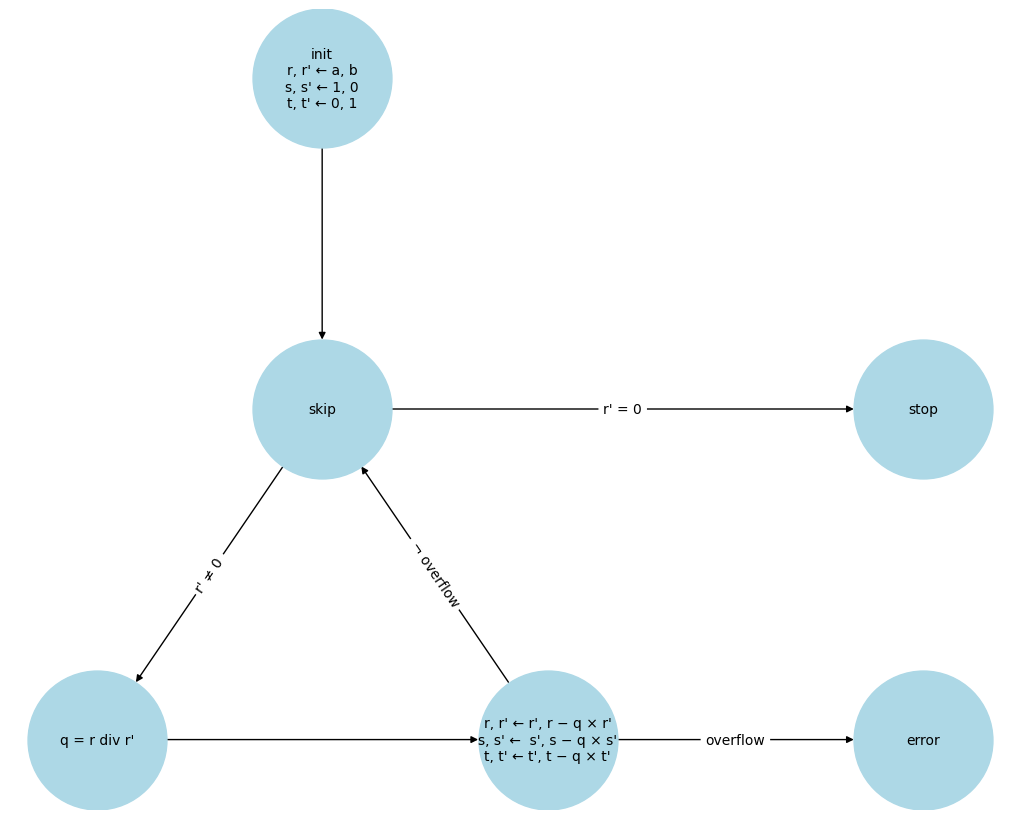

In [5]:
### CFA
import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo direcionado
G = nx.DiGraph()

# Adicionando nós (estados) com suas respectivas labels
G.add_node("init", label="init\nr, r' ← a, b\ns, s' ← 1, 0\nt, t' ← 0, 1")
G.add_node("skip", label="skip")
G.add_node("stop", label="stop")
G.add_node("one", label="q = r div r'")
G.add_node("two", label="r, r' ← r', r − q × r'\ns, s' ←  s', s − q × s'\nt, t' ← t', t − q × t'")
G.add_node("error", label="error")

# Adicionando arestas com as condições
G.add_edge("init", "skip")
G.add_edge("skip", "stop", label="r' = 0")
G.add_edge("skip", "one", label = "r' ≠ 0")
G.add_edge("one", "two")
G.add_edge("two", "error", label="overflow")
G.add_edge("two", "skip", label="¬ overflow")

# Definindo posições manuais para cada nó (layout hierárquico)
pos = {
    "init": (0, 1),
    "skip": (0, 0),
    "stop": (2, 0),
    "one": (-0.75, -1),
    "two": (0.75, -1),
    "error": (2, -1)  
    }

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=10000, node_color="lightblue", font_size=10, font_weight="bold")

node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()

### Sistema de Equações

In [ ]:
### Sistema de equações
from pysmt.shortcuts import *